In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

C:\Users\mervi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.shape

(178, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Type,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [8]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [9]:
df.duplicated().sum()

0

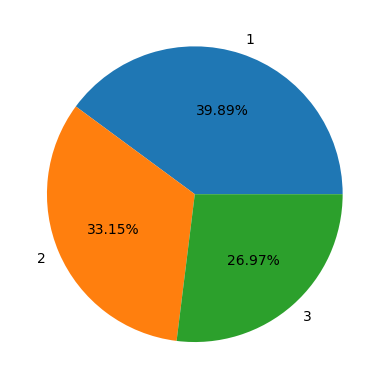

In [26]:
df['Type'].value_counts()
plt.pie(df['Type'].value_counts(),labels=df['Type'].unique(),autopct='%1.2f%%')
plt.show()

type 1 wine are availabe mostly

In [32]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

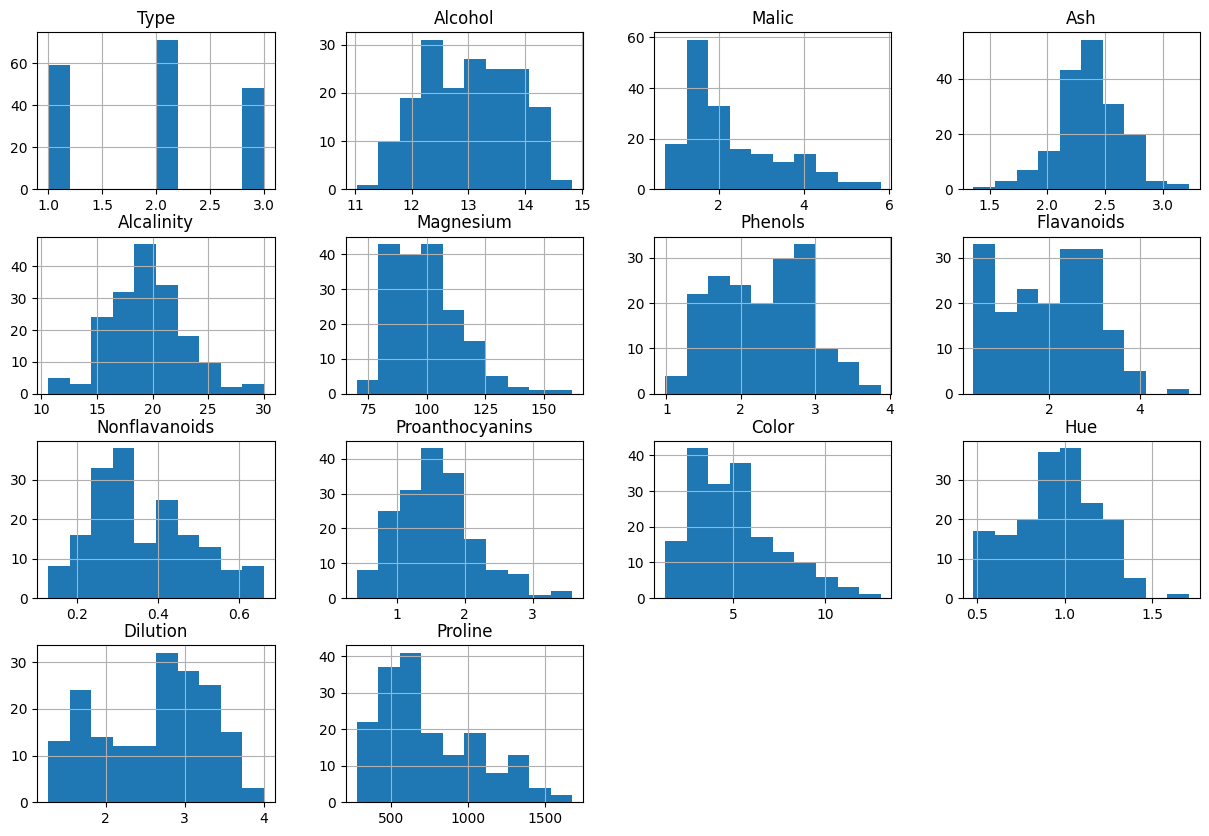

In [45]:
df.hist(figsize=(15,10))
plt.show()

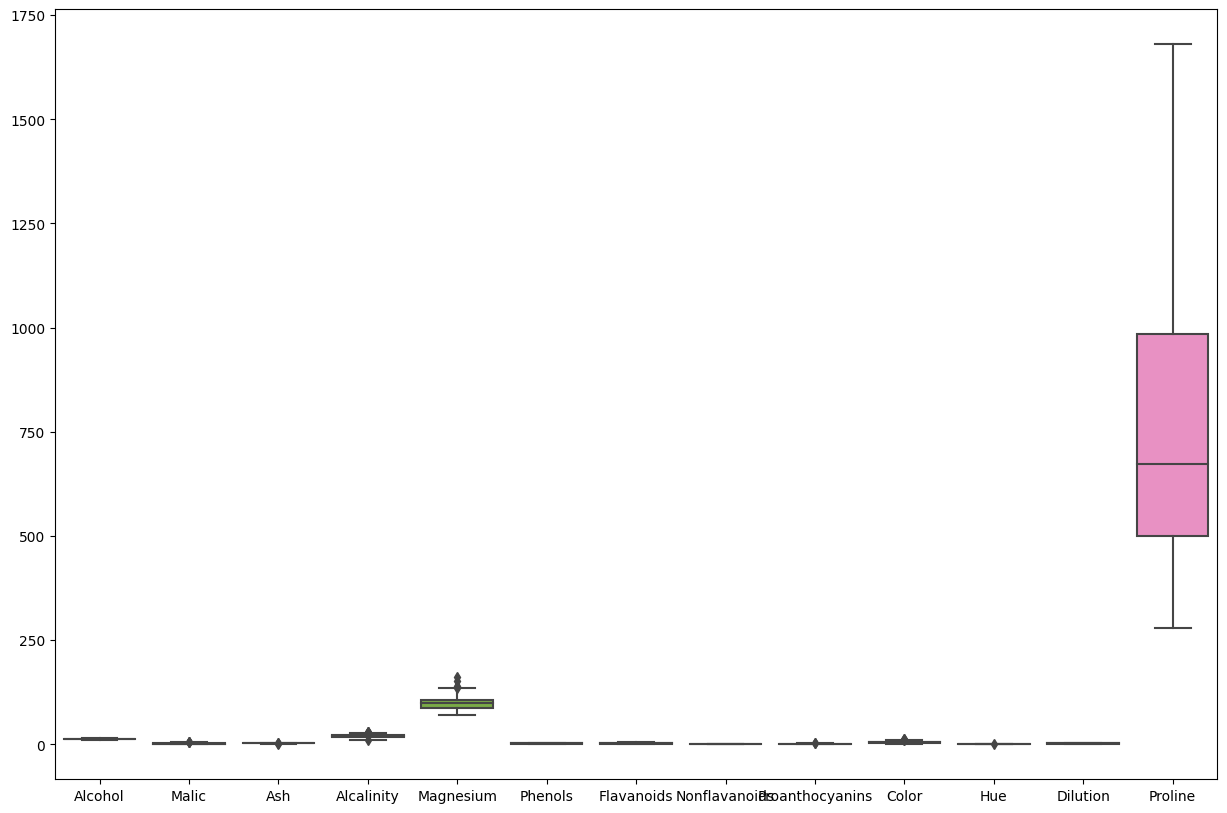

In [47]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop('Type', axis=1))
plt.show()

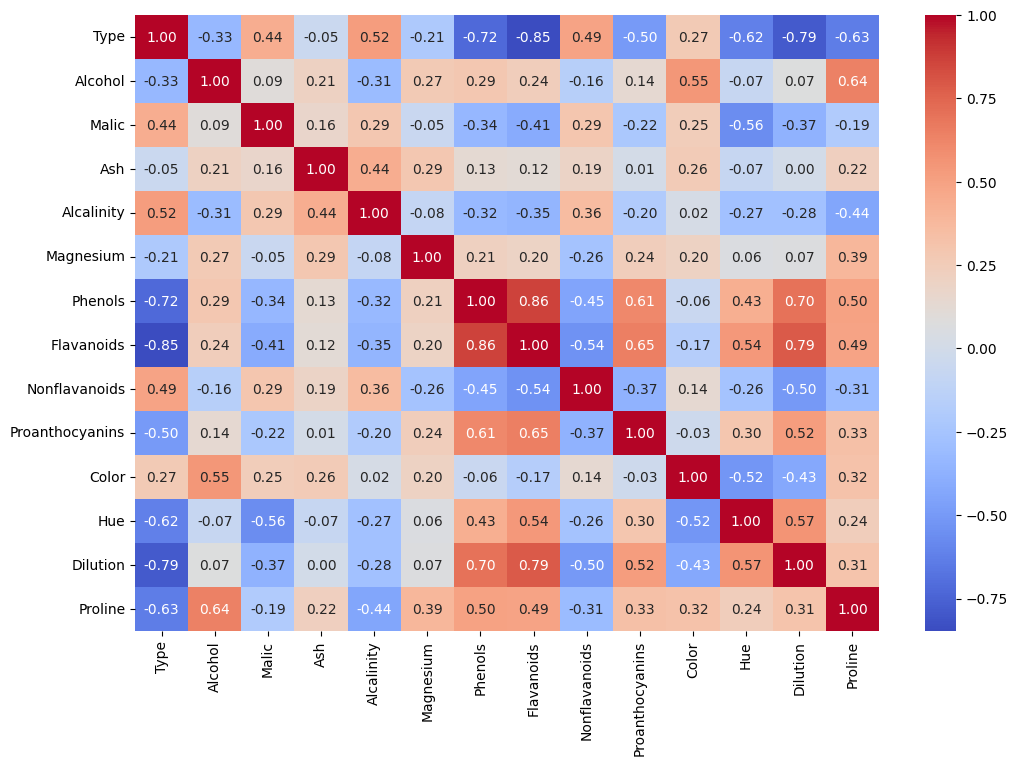

In [48]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
std_scaler=StandardScaler()

In [5]:
std_df=std_scaler.fit_transform(df.drop('Type', axis=1))

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA()
pca.fit(std_df)

PCA()

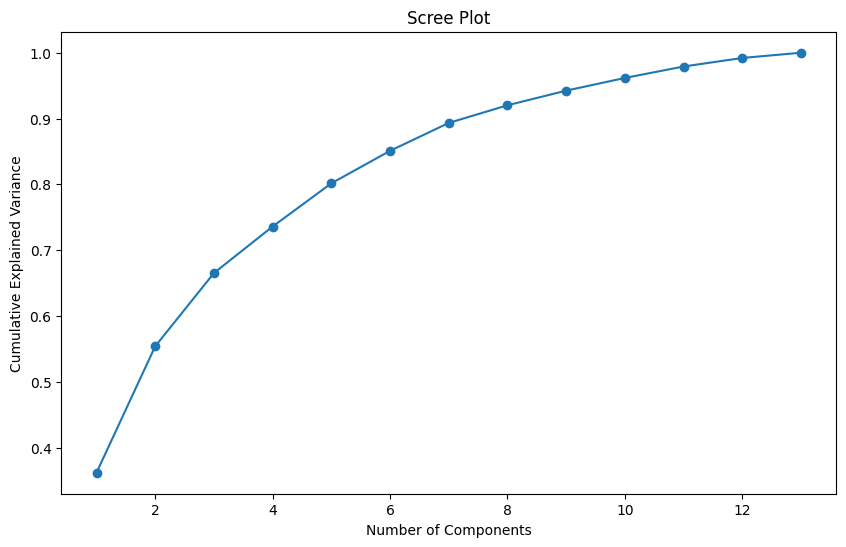

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [9]:

pca = PCA(n_components=4)
pca_data = pca.fit_transform(std_df)

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(std_df)

KMeans(n_clusters=3, random_state=42)

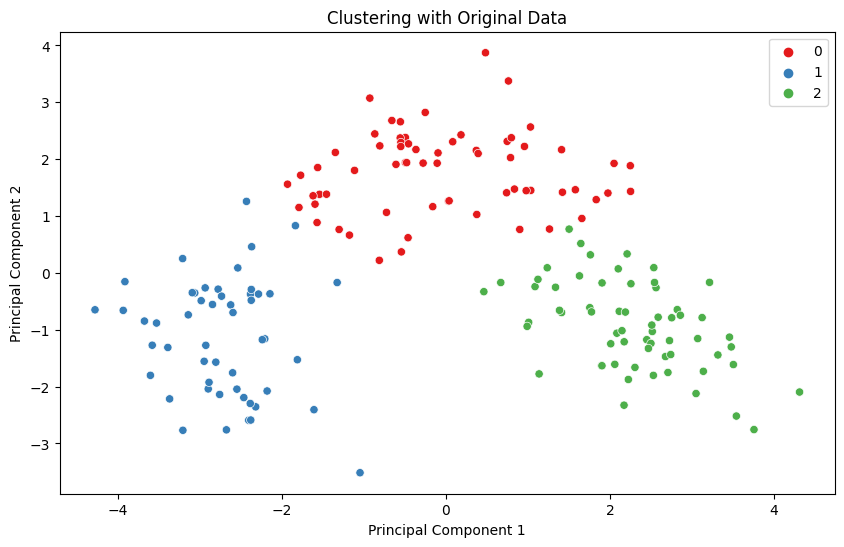

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans.labels_, palette='Set1', legend='full')
plt.title('Clustering with Original Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [14]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette_original = silhouette_score(std_df, kmeans.labels_)
davies_bouldin_original = davies_bouldin_score(std_df, kmeans.labels_)
print("Silhouette Score (Original Data):", silhouette_original)
print("Davies-Bouldin Index (Original Data):", davies_bouldin_original)

Silhouette Score (Original Data): 0.2848589191898987
Davies-Bouldin Index (Original Data): 1.3891879777181648


In [15]:
# Task 4: Clustering with PCA Data
# Step 1: Apply K-means clustering to PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pca_data)

KMeans(n_clusters=3, random_state=42)

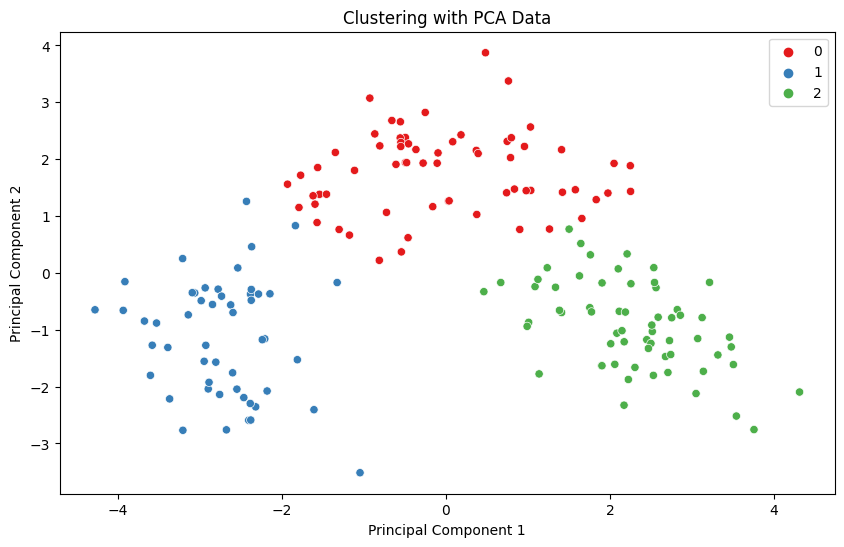

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_pca.labels_, palette='Set1', legend='full')
plt.title('Clustering with PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [17]:
silhouette_pca = silhouette_score(pca_data, kmeans_pca.labels_)
davies_bouldin_pca = davies_bouldin_score(pca_data, kmeans_pca.labels_)
print("Silhouette Score (PCA Data):", silhouette_pca)
print("Davies-Bouldin Index (PCA Data):", davies_bouldin_pca)

Silhouette Score (PCA Data): 0.40505685270102965
Davies-Bouldin Index (PCA Data): 0.9884375557459997


In [19]:
print("Comparison of Clustering Results:")
print("Silhouette Score (Original Data):", silhouette_original)
print("Silhouette Score (PCA Data):", silhouette_pca)
print("Davies-Bouldin Index (Original Data):", davies_bouldin_original)
print("Davies-Bouldin Index (PCA Data):", davies_bouldin_pca)

Comparison of Clustering Results:
Silhouette Score (Original Data): 0.2848589191898987
Silhouette Score (PCA Data): 0.40505685270102965
Davies-Bouldin Index (Original Data): 1.3891879777181648
Davies-Bouldin Index (PCA Data): 0.9884375557459997
